In [73]:
# Dennis_Mwai_673
# Data extraction and transformation from real world dateset
#importing necessary libraries

import pandas as pd
import sqlite3
import os
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

# Step 1: extract data from csv file
# Load the dataset
raw_data = pd.read_csv(r'C:\Users\HP\Documents\edu\data mining\ET_Exam_Dennis_Mwai_673\raw_data.csv')
# Display the first few rows of the dataset
raw_data.head()
raw_data.columns


Index(['OBJECTID', 'Academic Year', 'Fed ID', 'CDS Code', 'District Code',
       'School Code', 'Region', 'County Name', 'District Name', 'School Name',
       'School Type', 'Status', 'Open Date', 'Closed Date', 'School Level',
       'Grade Low', 'Grade High', 'Charter', 'Charter Num', 'Funding Type',
       'Virtual', 'Magnet', 'Title I', 'DASS', 'Assistance Status ESSA',
       'Street', 'City', 'Zip', 'State', 'Locale', 'School Website',
       'Enroll Total', 'African American', 'African American (%)',
       'American Indian', 'American Indian Pct', 'Asian', 'Asian (%)',
       'Filipino', 'Filipino (%)', 'Hispanic', 'Hispanic (%)',
       'Pacific Islander', 'Pacific Islander (%)', 'White', 'White (%)',
       'Two or More Races', 'Two or More Races (%)', 'Not Reported',
       'Not Reported (%)', 'English Learner', 'English Learner (%)', 'Foster',
       'Foster (%)', 'Homeless', 'Homeless (%)', 'Migrant', 'Migrant (%)',
       'Socioeconomically Disadvantaged',
       'Socio

In [74]:
# raw_data.info()
# Step 2: Data Transformation
# Check for missing values(the data has no missing values)
missing_values = raw_data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 OBJECTID         0
Academic Year    0
Fed ID           0
CDS Code         0
District Code    0
                ..
CongUSGeo        0
SenateCAGeo      0
AssemblyCAGeo    0
x                0
y                0
Length: 93, dtype: int64


In [75]:
# Step 3: Get latest month data and store it in incremental_data.csv(Data is already in it's most recrnt format raw_data will therefore = incremental_data) )
# Convert 'date' column to datetime format
raw_data['start_year'] = raw_data['Academic Year'].str.extract(r'(\d{4})')[0].astype(int)
raw_data['date'] = pd.to_datetime(raw_data['start_year'].astype(str) )

#chech types of data
raw_data.dtypes

# Connect data to sqlite database
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return conn

# Use sql to separate latest month data
database = r'C:\Users\HP\Documents\edu\data mining\ET_Exam_Dennis_Mwai_673\raw_data.db'
conn = create_connection(database)

# Write data to sqlite database
raw_data.to_sql('raw_data_table', conn, if_exists='replace', index=False)

# Query to get the latest month data and store it in incremental_data.csv and also in a dataframe
latest_month_data_query = """
SELECT * FROM raw_data_table
WHERE date = (SELECT MAX(date) FROM raw_data_table);
"""
latest_month_data = pd.read_sql_query(latest_month_data_query, conn)
latest_month_data.to_csv(r'C:\Users\HP\Documents\edu\data mining\ET_Exam_Dennis_Mwai_673\incremental_data.csv', index=False)

#store latest month data in sqlite database
database = r'C:\Users\HP\Documents\edu\data mining\ET_Exam_Dennis_Mwai_673\incremental_data.db'
conn = create_connection(database)
latest_month_data.to_sql('latest_month_data_table', conn, if_exists='replace', index=False)

# compare raw data and latest month data
print("Raw data shape:", raw_data.shape)
print("Latest month data shape:", latest_month_data.shape)






Raw data shape: (9982, 95)
Latest month data shape: (9982, 95)


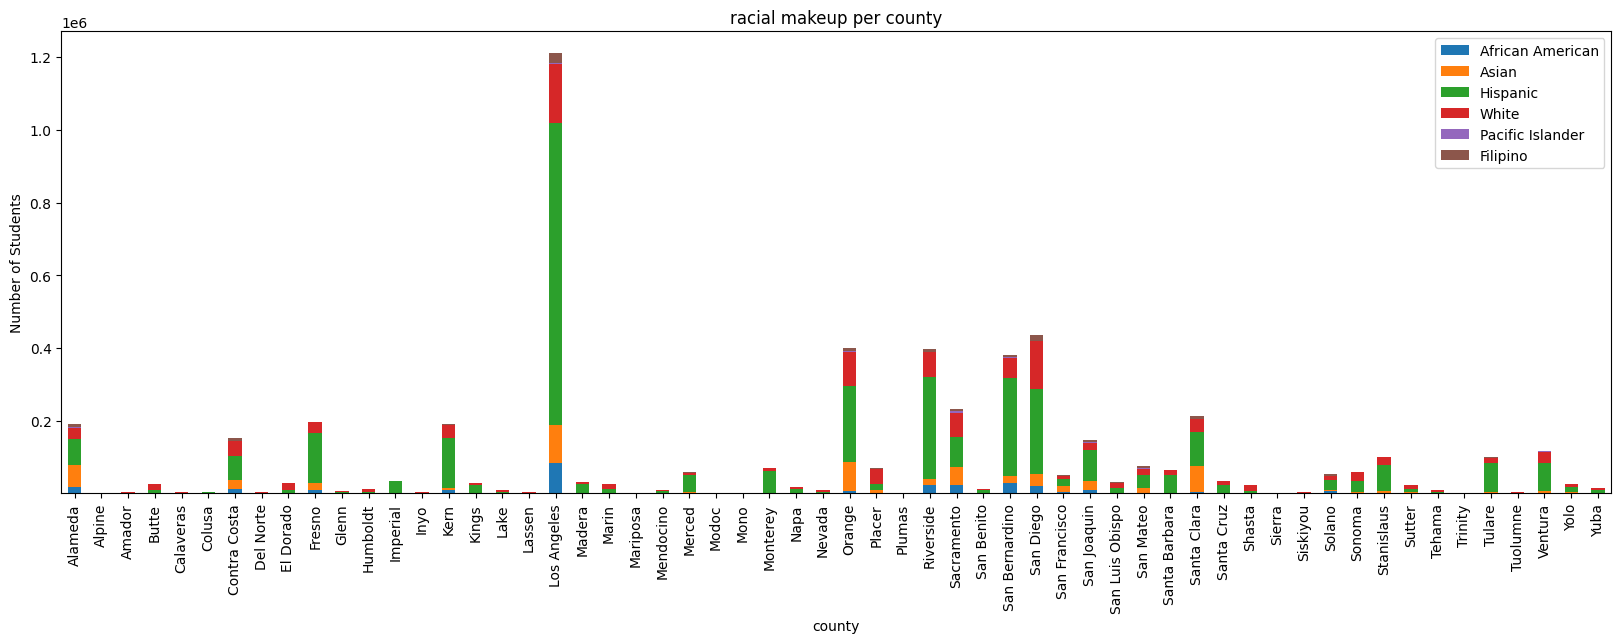

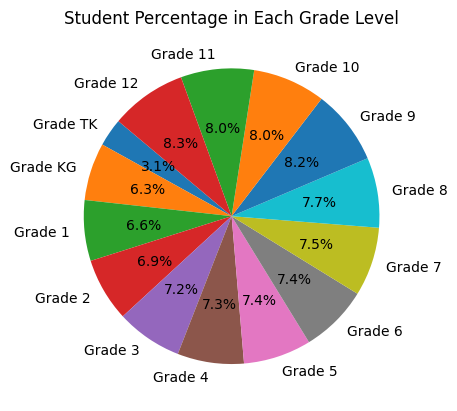

Average Grade Distribution:
 Grade TK    17.765478
Grade KG    36.548988
Grade 1     38.532158
Grade 2     40.327189
Grade 3     41.993488
Grade 4     42.156381
Grade 5     43.092066
Grade 6     43.203667
Grade 7     43.743338
Grade 8     44.452114
Grade 9     47.478261
Grade 10    46.182228
Grade 11    46.448808
Grade 12    48.332899
dtype: float64
  County Name                    School Type  Count
0     Alameda  Alternative Schools of Choice     16
1     Alameda                   Continuation     17
2     Alameda               County Community      2
3     Alameda                     Elementary    215
4     Alameda                           High     41


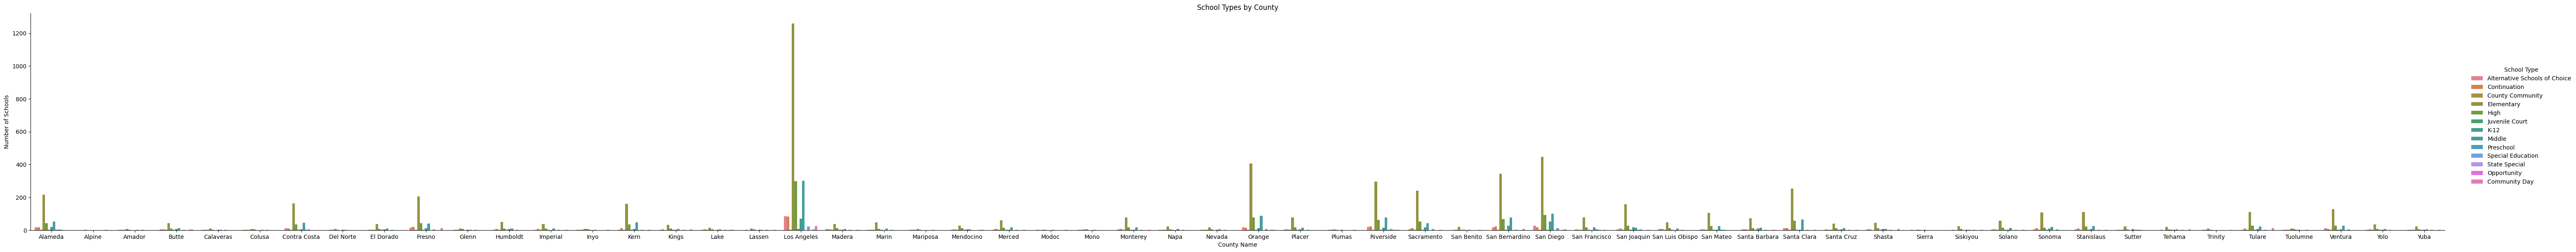

In [76]:
#step 4: data analysis (analysis will be done on the latest month data)
# latest_month_data.head()

# racial makeup per state
cols = ["African American", "Asian", "Hispanic", "White", "Pacific Islander","Filipino"]

for c in cols:
    latest_month_data[c] = pd.to_numeric(latest_month_data[c], errors='coerce').fillna(0)

racial_makeup_df = latest_month_data.groupby('County Name')[cols].sum()
racial_makeup_df.plot(kind='bar', stacked=True,figsize=(20,6))
plt.title('racial makeup per county')
plt.xlabel('county')
plt.ylabel('Number of Students')
plt.show()

# student percentage in each grade level
cols = ['Grade TK','Grade KG','Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']

for c in cols:
       latest_month_data[c] = pd.to_numeric(latest_month_data[c], errors='coerce').fillna(0)

grade_level_df = latest_month_data[cols].sum()
grade_level_df.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Student Percentage in Each Grade Level')
plt.show()
avge_grade_distribution = latest_month_data[cols].mean()
print("Average Grade Distribution:\n", avge_grade_distribution)

# getting school types by county
school_types_per_county = latest_month_data.groupby(['County Name', 'School Type']).size().reset_index(name='Count')
print(school_types_per_county.head())
sns.catplot(data=school_types_per_county, x='County Name', y='Count', hue='School Type', kind='bar', height=6, aspect=10,)
plt.title('School Types by County')
plt.xlabel('County Name')
plt.ylabel('Number of Schools')
plt.show()







### Results of analysis
1) racial analysis- Schools in these areas have predominantly Hispanic students and the least represented being the American indian students
2) grade distribution analysis - The grades are largely well distrinuted grade 9 makes up the most with 8.2 % and grade tk makes the leadt with 3.1 of the student population
3) School type analysis - elementary schools are the greatest in number and Los Angeles has the greatest number of schools
 